In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\danie\Documents\Python Projects\Data\weight\weight-height.csv")

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


<AxesSubplot:xlabel='Weight', ylabel='Height'>

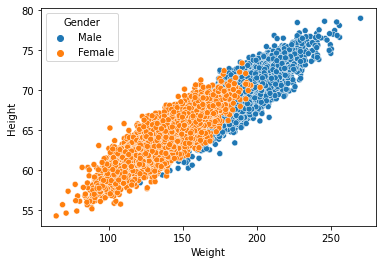

In [12]:
sns.scatterplot(data=df, x="Weight", y="Height", hue="Gender" )

In [20]:
#remove outliers using percentile 
lower_limit = df['Height'].quantile(0.01)
print(lower_limit)

58.13441158671655


In [22]:
upper_limit = df['Height'].quantile(0.99)
print(upper_limit)

74.7857900583366


In [25]:
df_new = df[(df.Height >= lower_limit) & (df.Height <= upper_limit)]
df_new.describe()

,Height,Weight
count,9800.000000,9800.000000
mean,66.364366,161.399489
std,3.645075,30.933549
min,58.134496,77.523774
25%,63.577162,136.322717
50%,66.318070,161.212928
75%,69.119896,186.753317
max,74.785714,249.946283


<AxesSubplot:xlabel='Weight', ylabel='Height'>

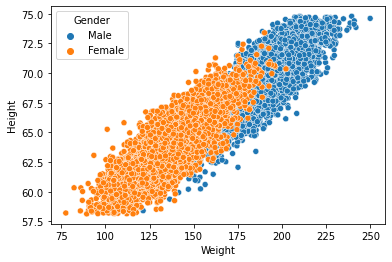

In [26]:
sns.scatterplot(data=df_new, x="Weight", y="Height", hue="Gender" )

In [46]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

<AxesSubplot:xlabel='Weight', ylabel='Height'>

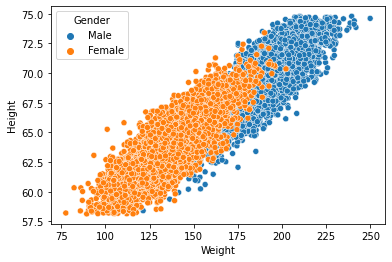

In [48]:
sns.scatterplot(data=df_new, x="Weight", y="Height", hue="Gender" )

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
Gender_drop = df_new.drop('Gender',axis=1)
Gender_drop.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [51]:
X_train, X_test, y_train, y_test = train_test_split(Gender_drop, df_new['Gender'], test_size=0.3)

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier(n_neighbors=1)

In [54]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [55]:
#"Prediction"
pred = knn.predict(X_test)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print(confusion_matrix(y_test,pred))

[[1300  177]
 [ 181 1282]]


In [59]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      Female       0.88      0.88      0.88      1477
        Male       0.88      0.88      0.88      1463

    accuracy                           0.88      2940
   macro avg       0.88      0.88      0.88      2940
weighted avg       0.88      0.88      0.88      2940



In [60]:
#Elbow emthod
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

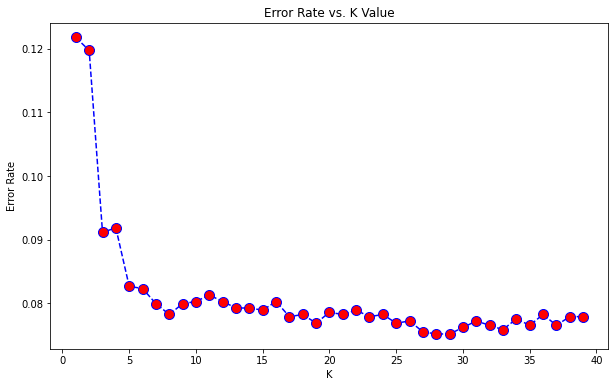

In [61]:
#create plot using the information from loop.
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [63]:
#Retrain with new K Value
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[1352  125]
 [ 118 1345]]


              precision    recall  f1-score   support

      Female       0.92      0.92      0.92      1477
        Male       0.91      0.92      0.92      1463

    accuracy                           0.92      2940
   macro avg       0.92      0.92      0.92      2940
weighted avg       0.92      0.92      0.92      2940

